# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
citytype_total_rides = pyber_data_df.groupby('type')['ride_id'].count()
citytype_total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_driver_count=city_data_df.groupby('type')['driver_count'].sum()
total_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type

total_all_fares = pyber_data_df.groupby('type')['fare'].sum()
total_all_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride = pyber_data_df.groupby('type')['fare'].mean()
avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare = total_all_fares / total_driver_count
avg_driver_fare


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
pyber_summary= pd.DataFrame({
    'Total Rides':total_all_fares, 
    'Total Drivers':total_driver_count,
    'Total Fares':total_all_fares,
    'Avg. Fare per Ride':avg_fare_ride,
    'Avg. Fare per Driver':avg_driver_fare})

pyber_summary.head()

,Total Rides,Total Drivers,Total Fares,Avg. Fare per Ride,Avg. Fare per Driver
type,,,,,
Rural,4327.93,78,4327.93,34.623440,55.486282
Suburban,19356.33,490,19356.33,30.970128,39.502714
Urban,39854.38,2405,39854.38,24.525772,16.571468


In [9]:
#  6. Create a PyBer summary DataFrame. Example 2 (tutoring session)
grp = pyber_data_df.groupby('type')
grp2 = city_data_df.groupby('type')

pyber_summary_df=pd.DataFrame({
    'Total Rides': grp.ride_id.count(),
    'Total Drivers': grp2.driver_count.sum(),
    'Total Fares' : grp.fare.sum(),
    'Avg. Fare per Ride' : grp.fare.mean(),
    'Avg. Fare per Driver': grp.fare.sum()/grp2.driver_count.sum()
})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Avg. Fare per Ride,Avg. Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.rename(index={'type':''})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Avg. Fare per Ride,Avg. Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  8. Format the columns.
pyber_summary_df.style.format({'Total Fares':'${0:,.2f}'})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Avg. Fare per Ride,Avg. Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [33]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [34]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_ttl_fares = pyber_data_df.groupby(['type','date']).fare.sum()
type_ttl_fares


type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [35]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_ttl_fares = type_ttl_fares.reset_index()
type_ttl_fares

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [36]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.
fare_pivot = type_ttl_fares.pivot(index='date', columns = 'type', values = 'fare')
fare_pivot

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [37]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
range_df = fare_pivot.loc['2019-01-01':'2019-04-29', :]
range_df


type,Rural,Suburban,Urban
date,,,


In [38]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
from datetime import datetime
fare_pivot.index = pd.to_datetime(fare_pivot.index)
fare_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-05-08 01:54:00,NaN,NaN,32.69
2019-05-08 02:31:00,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99


In [39]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_pivot.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [42]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_pivot_weekly = fare_pivot.resample('W').sum()
fare_pivot_weekly

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


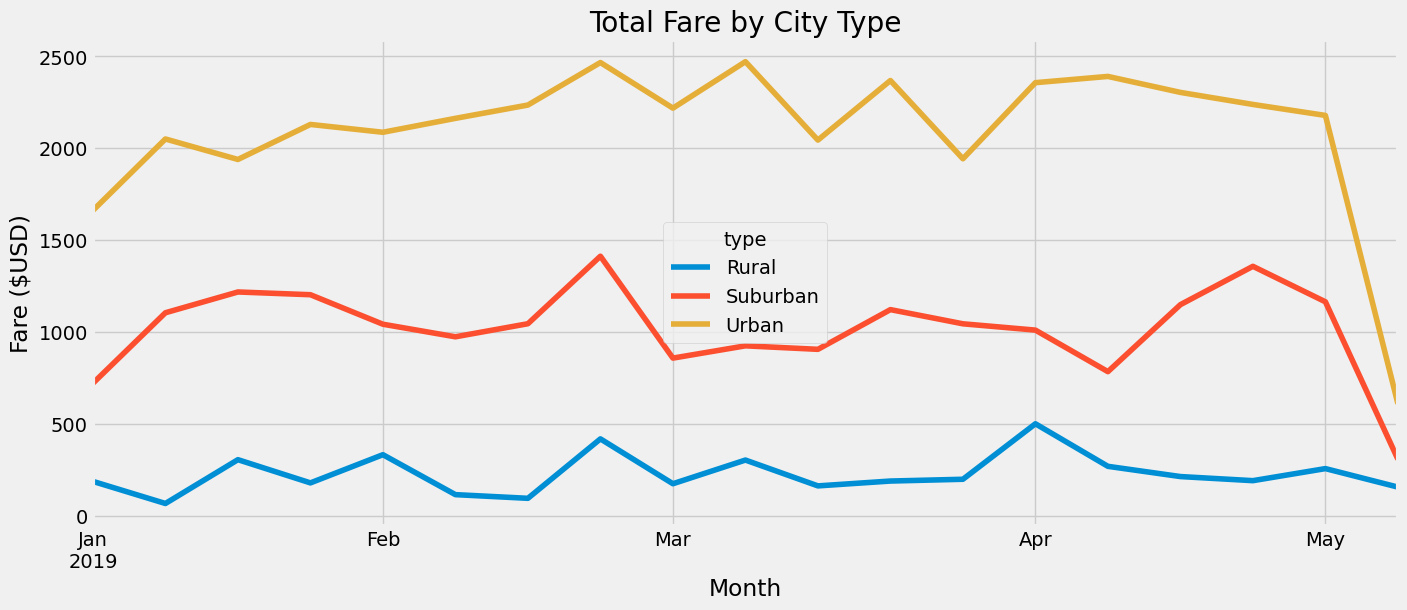

<Figure size 640x480 with 0 Axes>

In [64]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the 'fivethirtyeight' style

#create line graph from pivot
fare_pivot_weekly.plot(figsize = (15,6))
# .style.use('fivethirtyeight')

#create title and labels for axis
plt.title('Total Fare by City Type')
plt.xlabel('Month')
plt.ylabel('Fare ($USD)')

# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')

plt.show()
plt.savefig('Analysis/Pyber-fare_summary')
